# Análisis de Turismo en Mendoza
## Datos: mendoza_turismo_final_mensual_por_pais.csv

### Objetivo
Explorar, graficar y generar hipótesis relevantes sobre el turismo en Mendoza usando los datos mensuales y anuales por país, precios, intereses y estacionalidades.

In [1]:
# Instalar librerías
!pip install matplotlib seaborn pandas numpy --quiet


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Julyc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo de gráficos
sns.set(style="whitegrid")

In [3]:
# Cargar el archivo CSV
df = pd.read_csv("mendoza_turismo_final_filtrado.csv", sep=';')
df.head()

,indice_tiempo,pais_origen,punto_entrada,turistas,precio_promedio_usd,precio_minimo_usd,precio_maximo_usd,dias,variacion_usd_mensual,variacion_porcentual_usd,...,es_junio,es_julio,es_agosto,es_septiembre,es_octubre,es_noviembre,es_diciembre,mes_vendimia,vacaciones_invierno,temporada_alta
0,2014-01,Brasil,Aeropuerto Córdoba,654,7.1,6.0,8.0,31,2.0,33.33,...,0,0,0,0,0,0,0,0,0,1
1,2014-01,Chile,Aeropuerto Córdoba,1046,7.1,6.0,8.0,31,2.0,33.33,...,0,0,0,0,0,0,0,0,0,1
2,2014-01,"Ee.Uu, Canadá Y México",Aeropuerto Córdoba,1211,7.1,6.0,8.0,31,2.0,33.33,...,0,0,0,0,0,0,0,0,0,1
3,2014-01,Europa Y Resto Del Mundo,Aeropuerto Córdoba,719,7.1,6.0,8.0,31,2.0,33.33,...,0,0,0,0,0,0,0,0,0,1
4,2014-01,Resto De América,Aeropuerto Córdoba,763,7.1,6.0,8.0,31,2.0,33.33,...,0,0,0,0,0,0,0,0,0,1


## Hipótesis 1: ¿Existe estacionalidad marcada en la llegada de turistas?
### Hipótesis: Los meses de enero, julio y diciembre concentran la mayor cantidad de turistas, coincidiendo con vacaciones y temporada alta.

C:\Users\Julyc\AppData\Local\Temp\ipykernel_7196\3213775186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=turistas_mes.index, y=turistas_mes.values, palette="viridis")


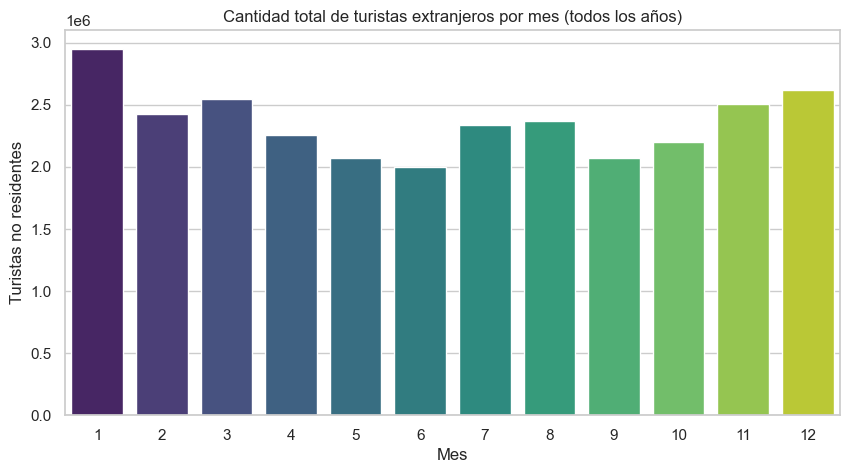

In [4]:
# Agrupar por mes y sumar turistas
turistas_mes = df.groupby('mes')['turistas'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=turistas_mes.index, y=turistas_mes.values, palette="viridis")
plt.title('Cantidad total de turistas extranjeros por mes (todos los años)')
plt.xlabel('Mes')
plt.ylabel('Turistas no residentes')
plt.show()

## Hipótesis 2: ¿Qué países generan mayor turismo y cómo ha cambiado?
### Hipótesis: Chile y Brasil son los principales mercados.

C:\Users\Julyc\AppData\Local\Temp\ipykernel_7196\1387556784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.values, y=top_paises.index, palette="magma")


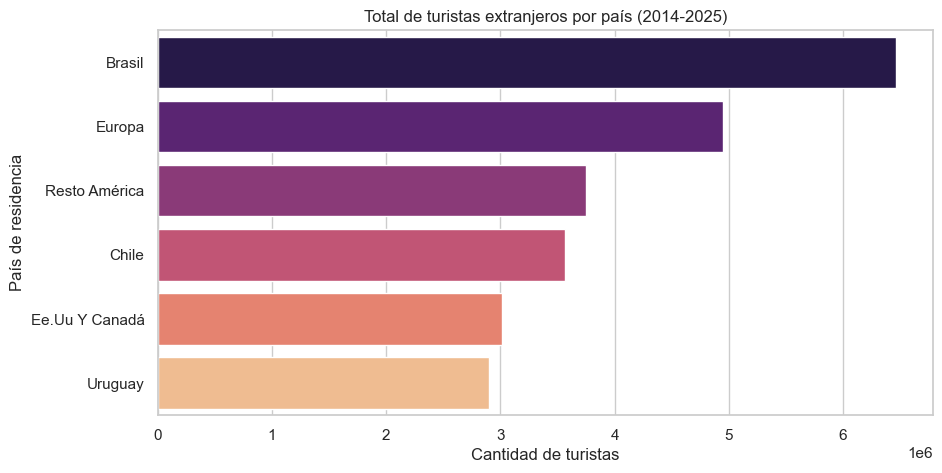

In [5]:
# Top países por cantidad de turistas
top_paises = df.groupby('pais_origen')['turistas'].sum().sort_values(ascending=False).head(6)
plt.figure(figsize=(10,5))
sns.barplot(x=top_paises.values, y=top_paises.index, palette="magma")
plt.title('Total de turistas extranjeros por país (2014-2025)')
plt.xlabel('Cantidad de turistas')
plt.ylabel('País de residencia')
plt.show()

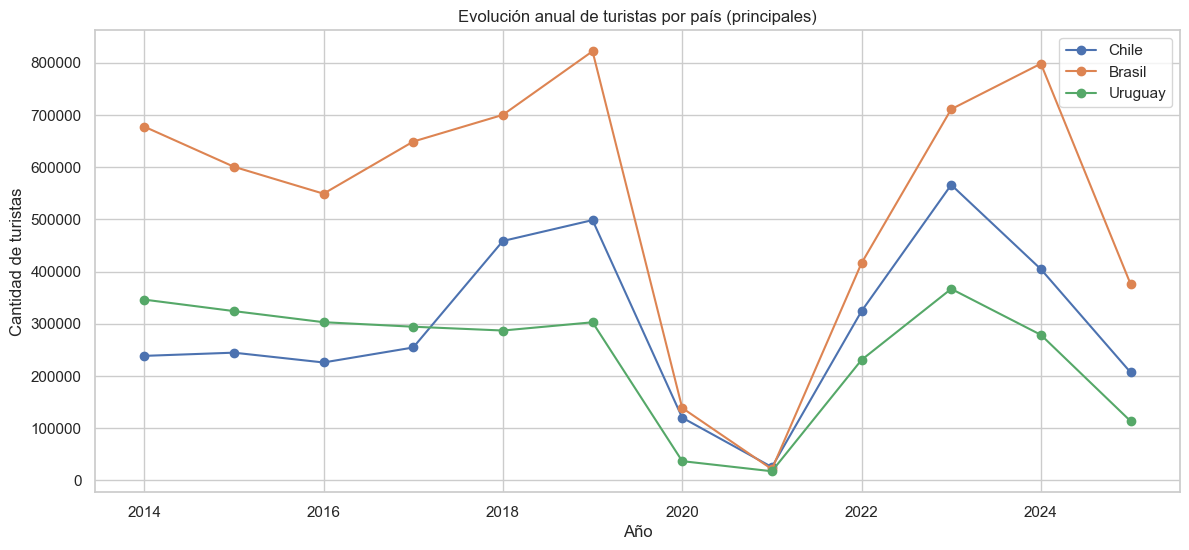

In [6]:
# Evolución de turistas de Chile vs Brasil vs Uruguay
plt.figure(figsize=(14,6))
for pais in ['Chile', 'Brasil', 'Uruguay']:
    datos = df[df['pais_origen']==pais].groupby('año')['turistas'].sum()
    plt.plot(datos.index, datos.values, marker='o', label=pais)
plt.legend()
plt.title('Evolución anual de turistas por país (principales)')
plt.xlabel('Año')
plt.ylabel('Cantidad de turistas')
plt.show()

## Hipótesis 3: ¿La variabilidad del precio y el interés de Google afectan la afluencia turística?
### Hipótesis: Los meses con mayor variabilidad de precios o mayor interés en Google coinciden con picos turísticos.

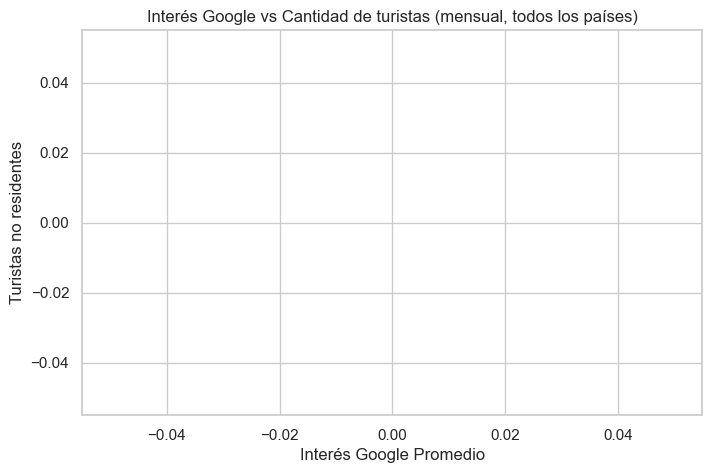

In [7]:
# Relación entre interés Google promedio y cantidad de turistas mensuales
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['interes_google_promedio'], y=df['turistas'], alpha=0.3)
plt.title('Interés Google vs Cantidad de turistas (mensual, todos los países)')
plt.xlabel('Interés Google Promedio')
plt.ylabel('Turistas no residentes')
plt.show()

## Hipótesis 4: ¿Las vacaciones y eventos impactan el turismo?
### Hipótesis: Los meses de vacaciones (invierno y verano) y la Vendimia muestran picos en la llegada de turistas.

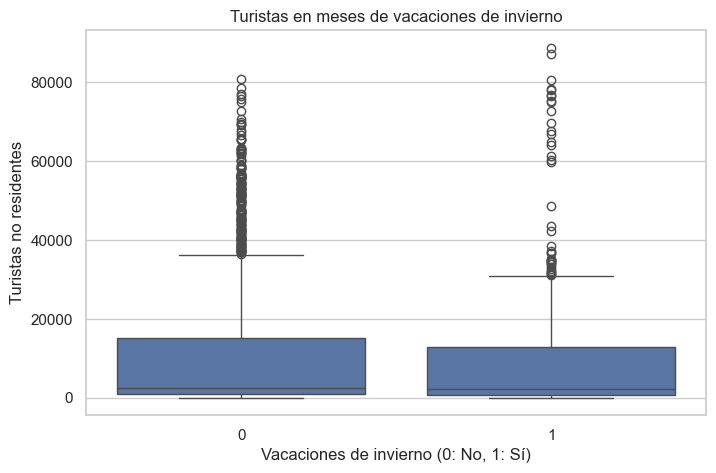

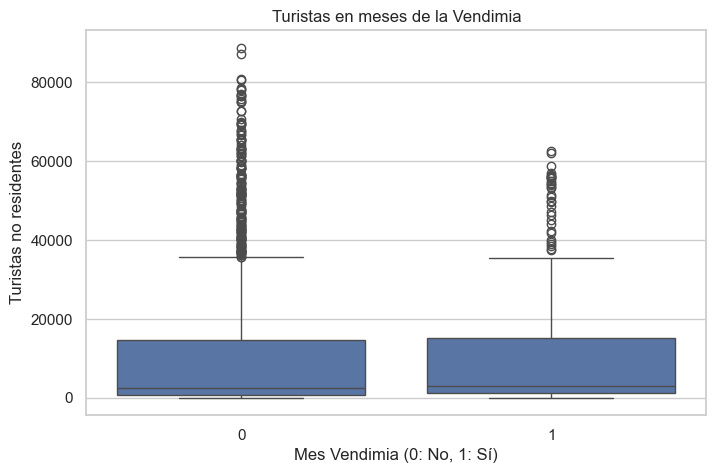

In [8]:
# Efecto vacaciones de invierno y Vendimia
df['vacaciones_invierno'] = df['vacaciones_invierno'].astype(int)
df['mes_vendimia'] = df['mes_vendimia'].astype(int)

plt.figure(figsize=(8,5))
sns.boxplot(x='vacaciones_invierno', y='turistas', data=df)
plt.title('Turistas en meses de vacaciones de invierno')
plt.xlabel('Vacaciones de invierno (0: No, 1: Sí)')
plt.ylabel('Turistas no residentes')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='mes_vendimia', y='turistas', data=df)
plt.title('Turistas en meses de la Vendimia')
plt.xlabel('Mes Vendimia (0: No, 1: Sí)')
plt.ylabel('Turistas no residentes')
plt.show()

## Hipótesis 5: Relación entre el precio del dólar y la cantidad de turistas de Chile, Brasil y Uruguay
### La cantidad de turistas provenientes de Chile, Brasil y Uruguay está influida por el precio del dólar: a mayor precio del dólar, la llegada de turistas de estos países tiende a aumentar, ya que les resulta más conveniente viajar a Mendoza.

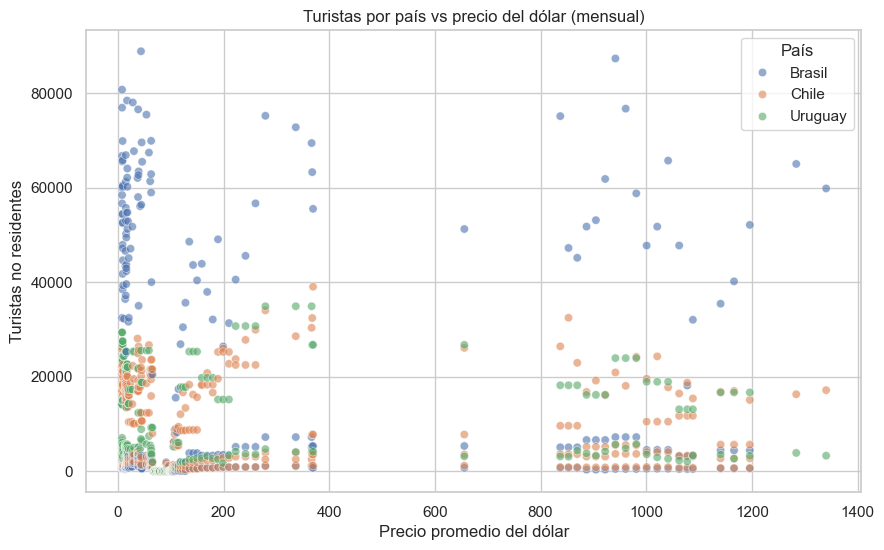

In [9]:
# Filtrar solo Chile, Brasil y Uruguay
paises = ['Chile', 'Brasil', 'Uruguay']
df_filtrado = df[df['pais_origen'].isin(paises)]

# Gráfico de dispersión por país
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_filtrado,
    x='precio_promedio_usd',           
    y='turistas',
    hue='pais_origen',
    alpha=0.6
)
plt.title('Turistas por país vs precio del dólar (mensual)')
plt.xlabel('Precio promedio del dólar')
plt.ylabel('Turistas no residentes')
plt.legend(title='País')
plt.show()

## Hipótesis 6: Influencia de las vacaciones (argentinas, brasileñas y europeas) en la cantidad de turistas provenientes de Brasil y Europa
### La cantidad de turistas provenientes de Brasil y Europa a Mendoza aumenta en los meses que coinciden con las vacaciones escolares o de verano/invierno en Argentina, Brasil y Europa respectivamente.

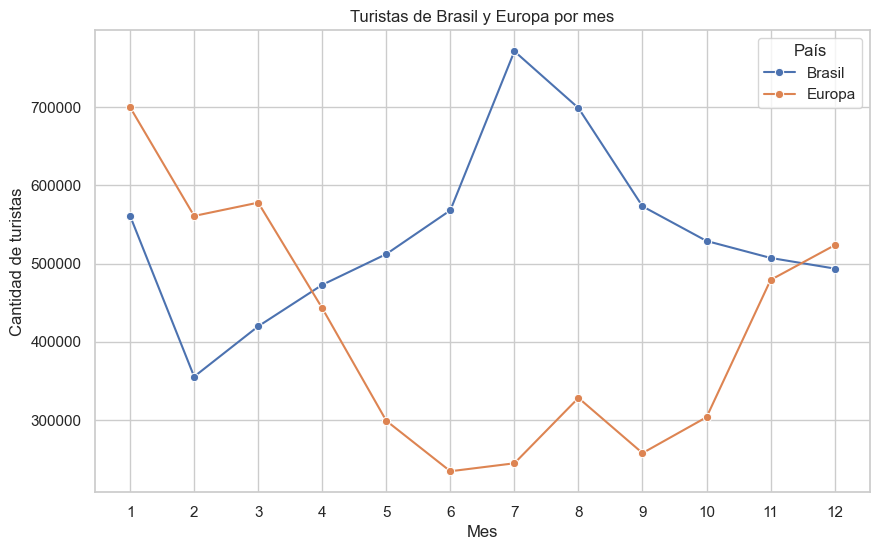

In [10]:
df_br_eur = df[df['pais_origen'].isin(['Brasil', 'Europa'])]
# Agrupar por mes y país
df_br_eur_grouped = df_br_eur.groupby(['mes', 'pais_origen'])['turistas'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_br_eur_grouped,
    x='mes', y='turistas', hue='pais_origen', marker='o'
)
plt.title('Turistas de Brasil y Europa por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de turistas')
plt.xticks(range(1,13))
plt.legend(title='País')
plt.show()

### Conclusiones generales:

**H1:** El gráfico evidencia una marcada estacionalidad en la llegada de turistas extranjeros a Mendoza. Enero es el mes con mayor afluencia, superando los 2.9 millones de turistas acumulados en el período analizado, seguido de cerca por diciembre y julio. Esto confirma la hipótesis de que los meses de vacaciones (verano e invierno) concentran la mayor cantidad de visitantes, lo que es consistente con los patrones turísticos internacionales y la oferta turística local en esos meses.

**H2:** El análisis del total de turistas extranjeros por país para el período 2014-2023 muestra que Brasil es el principal mercado emisor de turistas hacia Mendoza, con casi 6 millones de visitantes. Europa y el Resto de América también presentan cifras muy elevadas, superando a Chile, que históricamente fue uno de los principales mercados. Esto indica una diversificación en el origen de los turistas extranjeros y un crecimiento notable de mercados no limítrofes. La hipótesis se confirma parcialmente: Brasil sigue siendo clave, pero la proporción de turistas provenientes de Chile ha disminuido en relación a otros mercados emergentes.

El análisis de la evolución anual de turistas provenientes de los principales países emisores muestra que Brasil se ha mantenido como el mercado más importante para Mendoza durante todo el período 2014-2025, con una tendencia creciente previa a la pandemia y una fuerte recuperación posterior. Chile, si bien históricamente estuvo por debajo de Brasil, exhibió un crecimiento significativo entre 2018 y 2019, y recupera también importancia tras la pandemia. Uruguay mantiene cifras más estables y menores, aunque sigue la misma tendencia general. La pandemia de COVID-19 provocó una caída abrupta del turismo internacional en 2020 y 2021, pero a partir de 2022 se observa una recuperación, especialmente marcada en el caso de Brasil. Esto confirma que, si bien Brasil es el principal mercado, la proporción de turistas de otros países puede variar considerablemente según el contexto internacional y local.

**H3:** El análisis de la relación entre el interés promedio de Google y la cantidad de turistas extranjeros mensuales no muestra una correlación directa o fuerte entre ambas variables. Si bien el interés en Google podría reflejar una mayor atención o deseo de viajar a Mendoza, esto no necesariamente se traduce en una mayor llegada de turistas en ese mismo mes. Otros factores, como la estacionalidad, la situación económica, restricciones de viaje o la antelación en la planificación del viaje, pueden influir más fuertemente en la afluencia turística real.

**H4:** El análisis comparativo de la llegada de turistas extranjeros durante los meses de vacaciones de invierno y el resto del año muestra que no existe una diferencia significativa entre ambos períodos. Tanto la mediana como la dispersión de turistas mensuales son similares, lo que sugiere que las vacaciones de invierno no generan un pico marcado en la afluencia de turistas internacionales a Mendoza. Esto indica que la estacionalidad vinculada a las vacaciones de invierno podría tener un menor peso en el turismo extranjero de la provincia respecto a otros factores o períodos vacacionales.

El análisis de la llegada de turistas extranjeros durante los meses de la Vendimia no muestra diferencias significativas en relación con el resto del año. Tanto la mediana como la dispersión de turistas mensuales son similares, lo que indica que el evento, aunque relevante a nivel cultural y turístico, no genera un pico marcado de turismo internacional en el agregado mensual. Es posible que el impacto de la Vendimia sea más perceptible en el turismo nacional o esté diluido por otros factores de estacionalidad y contexto internacional.

**H5:** El análisis de la relación entre el precio del dólar y la llegada de turistas de Chile, Brasil y Uruguay no muestra una correlación positiva clara. Contrariamente a lo que podría suponerse, un dólar más alto no se traduce necesariamente en una mayor afluencia de turistas de estos países. Factores como la estacionalidad, la coyuntura económica y las circunstancias internacionales parecen tener un mayor impacto en la llegada de turistas que el precio del dólar por sí solo.

**H6:** El análisis mensual de la llegada de turistas provenientes de Brasil y Europa evidencia patrones estacionales claramente diferenciados. Los turistas brasileños muestran un pico muy marcado en julio, coincidiendo con las vacaciones de invierno en su país, cuando buscan destinos con nieve como Mendoza. Por otro lado, los turistas europeos concentran sus visitas en los meses de verano austral (enero a marzo) y en los meses cercanos a fin de año, coincidiendo con sus propios períodos vacacionales. Estos resultados confirman que las vacaciones escolares y de verano/invierno en los países de origen influyen significativamente en la afluencia turística hacia Mendoza y reflejan la importancia de adaptar la oferta turística a la estacionalidad de cada mercado.